# Introduction

Capacitors are essential to electronics as they allow for circuits to store and
release energy over time. They consist of two conductive plates separated by
some sort of dielectric, and store charge when one plate is connected to a
positive charge and the other a negative. In this lab, we explored how
capacitors work, as well as all the components that are required to make an
efficient capacitor. By learning the properties of capacitors, and how
capacitance changes with different plate separation distances or dielectric
constants, we can gain a better understanding on how electric fields interact
with their surroundings.


# Problem 1: Charging Capacitance

Materials: Variable separation parallel plate capacitor, power supply,
Coulombmeter, Faradmeter.

For this experiment, we aimed to test the accuracy of the follow equations for
capacitance on a 10 cm radius, 1 cm separated parallel plate capacitor:

$$ C = \varepsilon_0 \frac{A}{d} \qquad C = \frac{Q}{V} $$

Procedure: To begin the experiment, we set the distance on our variable
separation parallel plate capacitor to 1cm and grounded it to ensure the results
were as accurate as possible. We then applied a charge of 1000V to the capacitor
using a power supply and switch. After the capacitor was charged, we flipped the
switch so that the capacitor was connected to a coulombmeter rather than the
power supply. The value displayed on the coulomb meter was then recorded, and
the experiment was repeated to average the results to be even more accurate.
Finally, we calculated what the capacitance should be using the capacitance
equation above and measured the capacitance with a Faradmeter so we could
compare the three results.

Data:

In [109]:
from math import *

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Problem 1

charge = np.array([63, 60, 61, 61, 59, 57])  # nC
charge_avg = np.average(charge)
charge_std = np.std(charge)
capac = (charge_avg * 10**-9) / 1000 # F

dist = 0.01  # m
r = 0.1  # m
plate_area = pi * r**2  # m^2
epsilon = 8.85418782e-12  # C/m
capac_theory = epsilon * plate_area / dist

print("== Problem 1 ==")
print(f"Charge avg: {round(charge_avg, 3)} nC, std: {round(charge_std, 3)} nC")
print(f"Capacitance (experiment est.): {round(capac*10**12, 3)} pF")
print(f"Capacitance (theory est.): {round(capac_theory*10**12, 3)} pF")
print(f"Capacitance (real): {33} pF")



== Problem 1 ==
Charge avg: 60.167 nC, std: 1.863 nC
Capacitance (experiment est.): 60.167 pF
Capacitance (theory est.): 27.816 pF
Capacitance (real): 33 pF


Data Analysis: While the measured capacitance using the Faradmeter and the
theoretical capacitance calculated by finding the dimensions of the capacitor
are in agreement, the value calculated from the charge measured on the
Coulombmeter differed by a factor of 2. The discrepancies are likely due to
stray capacitance caused by nearby wires and the human body.

# Problem 2: Capacitance, at a Distance

Materials: Variable separation parallel plate capacitor, power supply,
Faradmeter.

The aim of this experiment was to determine the accuracy of the equation $C =
\varepsilon_0 \frac{A}{d}$ at various distances ranging from 1 mm to 13 cm.

Procedure: All wires were disconnected from the parallel plate capacitor and it
was grounded using the grounding wand. The capacitor was moved to the measuring
distance. From 1mm to 1cm, measurements were taken each mm. From 1cm to 13cm,
measurements were taken each cm. The Faradmeter was zeroed then each probe was
connected to a plate of the capacitor. The measured capacitance was recorded.

Data:


/tmp/ipykernel_4176/788566950.py:10: RuntimeWarning: overflow encountered in power
  return a * x**r


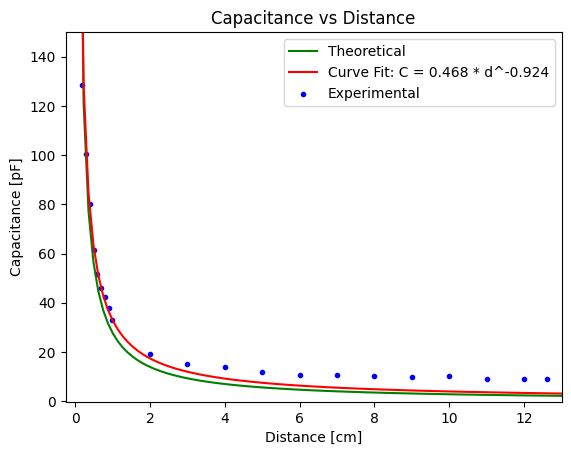

In [110]:
# Problem 2

dist = 0.01 * np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12.6]) # m
capac = np.array([284, 128.7, 100.5, 80, 61.6, 51.5, 46.1, 42.2, 38, 33, 19, 15, 14, 12, 10.8, 10.8, 10.3, 9.6, 10.3, 9, 9, 8.8]) # pF

fit_dist = 0.01 * np.linspace(0.1, 13, 100) # m


def func(x, r, a):
    return a * x**r


popt, _ = curve_fit(func, dist, capac)

plt.plot(100 * fit_dist, ((epsilon * plate_area) / fit_dist) * 10**12, c="green")
plt.plot(100 * fit_dist, func(fit_dist, popt[0], popt[1]), c="red")
plt.scatter(100 * dist, capac, marker=".", c="blue")
plt.title("Capacitance vs Distance")
plt.xlabel("Distance [cm]")
plt.ylabel("Capacitance [pF]")
plt.legend(["Theoretical", f"Curve Fit: C = {round(popt[1], 3)} * d^{round(popt[0], 3)}", "Experimental"])
_ = plt.axis([-0.25, 13, -0.25, 150])

Data Analysis: As can be seen in the graph, the theoretical value, the measured
value, and the curve fitted to the data all match very well. The equation for
the curve fit is $C = 0.468d^{-0.924}$. This agrees very closely with the
inverse relationship between C and d. The equation seemed to hold up quite well
even at further distances, although it began to deviate more around 8 cm.

# Problem 3: Dialectic into Dielectric

Materials: Two plates, Faradmeter, small book.

For this experiment, we sought out the dielectric constant of paper using the
following equation:

$$ C = \varepsilon \frac{A}{d} \implies C = k \varepsilon_0 \frac{A}{d} $$

$$ \boxed{k = \frac{Cd}{\varepsilon_0 A}} $$

Prodecure: To find the dielectric constant of paper, we began by using two
plates and placing them in a book, separated only using the pages of the book at
a distance of one centimeter. We then used a Faradmeter and recorded the
resulting value. This was repeated 12 times in total, removing 10 pages each
time so we could plot the value in the end, helping to give us a more accurate
constant when we get to calculations. The last measurement we needed to do was
find the area of the plates we added to the book, which was simply done by
measuring the width and length with a ruler and then multiplying them together.

Data:


In [111]:
# Problem 3

width = 0.077  # m
length = 0.11  # m
book_area = width * length # m^3

dist_book = 0.01/121 * np.array([121 - 0, 121 - 10, 121 - 20, 121 - 30, 121 - 40, 121 - 50, 121 - 60, 121 - 70, 121 - 80, 121 - 90, 121 - 100, 121 - 110, 121 - 120]) # m
capac_book = 10**-12 * np.array([21.3, 24.3, 25.6, 27.7, 32, 36.2, 40.2, 44, 55.3, 61.9, 80.6, 125.8, 575]) # F

k = capac_book * dist_book / (book_area * epsilon)
print(f"Average k: {round(np.average(k), 3)}")



Average k: 2.38


Data Analysis: An attempt was made to graph the distances and capacitance, but,
unlike problem 2, the small distances were much more finicky. The last
capacitance measured was across a distance of only one page of paper, which may
have impacted the final result for k at 2.38.

# Conclusion

The goals of this lab were accomplished successfully. In the first experiment,
the measurements taken allowed for an introduction to the methods used in the
lab. It also allowed us to explore the idea of stray capacitance. This was
evident when our experimental and our measured and calculated values for
capacitance differed by a factor of 2. The second experiment allowed us to
verify the equation for capacitance based on the dimensions of a parallel plate
capacitor. Our result aligned very closely with the theoretical inverse
relationship between C and d. The exponent for d in our experiment was found to
be -0.924; this is very close to one. The third experiment allowed us to apply
our knowledge of dielectrics in order to determine the dielectric constant of
paper. We found it to be 2.38; this value agrees with the value we found when
looking it up. By experimenting with a parallel plate capacitor, the theory we
learned in class is able to be applied in order to gain a deeper intuition for
an inherently unintuitive thing.
